# Scipy : high-level scientific computing

### Signal processing:  `scipy.signal`

#### Resampling `scipy.signal.resample()`: resample a signal to n points using FFT.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
t = np.linspace(0, 5, 100)
x = np.sin(t)

from scipy import signal
x_resampled = signal.resample(x, 25)

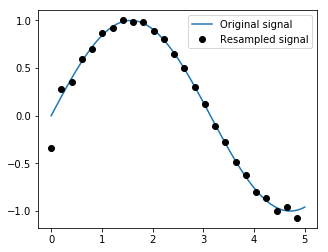

In [4]:
plt.figure(figsize=(5, 4))
plt.plot(t, x, label='Original signal')
plt.plot(t[::4], x_resampled, 'ko', label='Resampled signal')

plt.legend(loc='best')

#### Detrending `scipy.signal.detrend()` : remove linear trend from signal:

In [5]:
t = np.linspace(0, 5, 100)
x = t + np.random.normal(size=100)


In [6]:
from scipy import signal
x_detrended = signal.detrend(x)

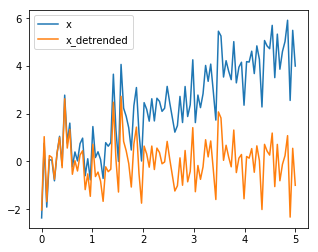

In [7]:
plt.figure(figsize=(5, 4))
plt.plot(t, x, label="x")
plt.plot(t, x_detrended, label="x_detrended")
plt.legend(loc='best')

#### Filtering: 
For non-linear filtering, `scipy.signa`l has filtering (median filter s`cipy.signal.medfilt()`, Wiener `scipy.signal.wiener()`), but we will discuss this in the image section.

scipy.signal also has a full-blown set of tools for the design of linear filter (finite and infinite response filters), but this is out of the scope of this tutorial.

#### Spectral analysis: 
`scipy.signal.spectrogram()` compute a spectrogram –frequency spectrums over consecutive time windows–, while `scipy.signal.welch()` comptes a power spectrum density (PSD).

##### Generate a chirp signal


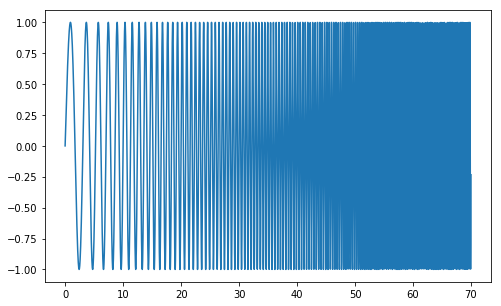

In [8]:
# Seed the random number generator
np.random.seed(0)

time_step = .01
time_vec = np.arange(0, 70, time_step)

# A signal with a small frequency chirp
sig = np.sin(0.5 * np.pi * time_vec * (1 + .1 * time_vec))

plt.figure(figsize=(8, 5))
plt.plot(time_vec, sig)

##### Compute and plot the spectrogram


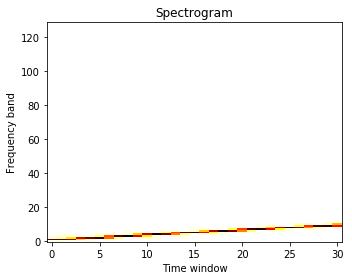

In [9]:
from scipy import signal
freqs, times, spectrogram = signal.spectrogram(sig)

plt.figure(figsize=(5, 4))
plt.imshow(spectrogram, aspect='auto', cmap='hot_r', origin='lower')
plt.title('Spectrogram')
plt.ylabel('Frequency band')
plt.xlabel('Time window')
plt.tight_layout()


##### Compute and plot the power spectral density (PSD)


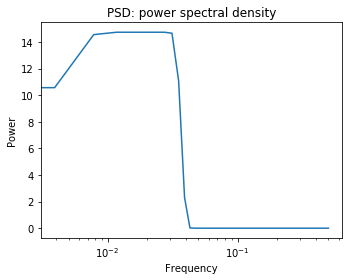

In [10]:
freqs, psd = signal.welch(sig)

plt.figure(figsize=(5, 4))
plt.semilogx(freqs, psd)
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

### Image manipulation: `scipy.ndimage`

#### Geometrical transformations on images

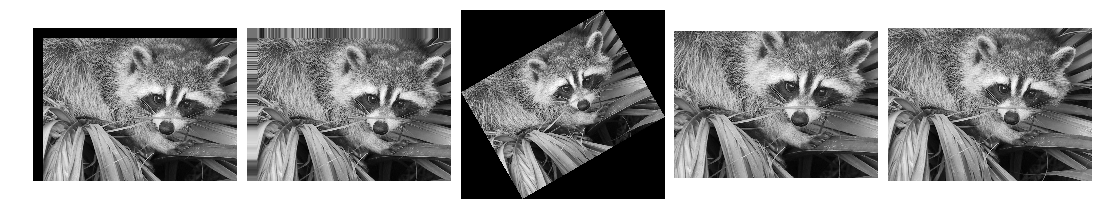

In [12]:
# Load some data
from scipy import misc
face = misc.face(gray=True)

# Apply a variety of transformations
from scipy import ndimage
from matplotlib import pyplot as plt
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest')
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 2)
zoomed_face.shape

plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)



#### Image filtering

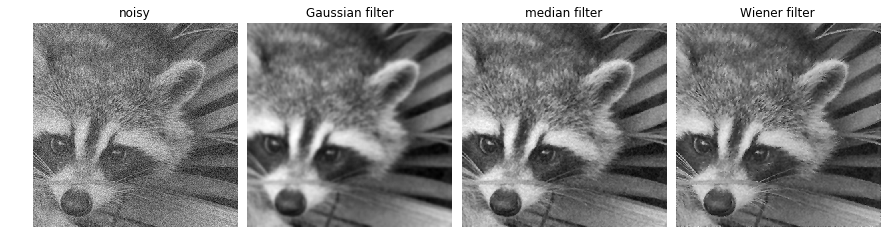

In [13]:
# Load some data
from scipy import misc
face = misc.face(gray=True)
face = face[:512, -512:]  # crop out square on right

# Apply a variety of filters
from scipy import ndimage
from scipy import signal
from matplotlib import pyplot as plt

import numpy as np
noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape)
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3)
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)